In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import json
import matplotlib
import collections

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
import scipy as sci


movies = pd.read_csv('C:/Users/Admin/Desktop/asiggment_2/tmdb_5000_movies.csv')


movies.head(10)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [101]:
to_drop = ['homepage','id','tagline','spoken_languages','keywords','original_language','runtime','status','overview']
movies.drop(to_drop,inplace = True , axis = 1)
movies.head()

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,John Carter,6.1,2124


In [102]:
movies.shape

(4803, 11)

In [103]:
movies.describe()

,budget,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000


Tính score_average

In [104]:
C= movies['vote_average'].mean()
m= movies['vote_count'].quantile(0.9)
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(481, 11)

In [105]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)


In [106]:
q_movies['score_average'] = q_movies.apply(weighted_rating, axis=1)


In [107]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score_average', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score_average']].head(10)

,title,vote_count,vote_average,score_average
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [108]:
movies['score_average'] = movies.apply(weighted_rating, axis=1)

In [109]:
movies.head()

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,title,vote_average,vote_count,score_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,Avatar,7.2,11800,7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,Spectre,6.3,4466,6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,John Carter,6.1,2124,6.096368


In [110]:
movies.shape

(4803, 12)

có 4803 hàng ,và 12 cột

Ý nghĩa của thông số:
budget :Ngân sách thực hiện bộ phim
genre :Thể loại phim Hành động, Hài, Kinh dị, v.v.
original_title :Tên phim trước khi dịch hoặc chuyển thể.
popularity:Một đại lượng số xác định mức độ phổ biến của bộ phim.
production_companies:Nhà sản xuất của phim.
production_countries:Quốc gia sản xuất.
release_date:Ngày phát hành.
revenue:Doanh thu trên toàn thế giới do bộ phim tạo ra.
title: Tựa đề bộ phim.
vote_average:xếp hạng trung bình mà phim nhận được.
vote_count:số lượng phiếu bầu đã nhận được.
score_average: điểm số trung bình bộ phim nhận được.


In [111]:
#............................................#


kiểm tra sample , có tồn tại missing value hay không , kiểu dữ liệu


In [112]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
score_average           4803 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 450.4+ KB


In [113]:
movies.isnull().any()

budget                  False
genres                  False
original_title          False
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
title                   False
vote_average            False
vote_count              False
score_average           False
dtype: bool

In [114]:
movies.isnull().sum()

budget                  0
genres                  0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
title                   0
vote_average            0
vote_count              0
score_average           0
dtype: int64

Chỉ có release_date là thiếu 1 dữ liệu nên không đáng kể, nên ta xem dữ liệu không có missing value. Dữ liệu có 3 float, 4 int64, 6 object.

 1/Sự ảnh hưởng của khu vực đến doanh thu.

In [115]:
movies['production_countries'] = movies['production_countries'].apply(ast.literal_eval)

In [116]:

# Lấy top 12 khu vực có doanh thu cao nhất
revenue_by_area = {}
n_movie = {}
area_values = movies['production_countries']
revenue = movies['revenue']
for index, values in enumerate(area_values):
    if revenue[index] != 0:
        for value in values:
            if value['iso_3166_1'] in revenue_by_area:
                revenue_by_area[value['iso_3166_1']] += revenue[index]
                n_movie[value['iso_3166_1']] += 1
            else:
                revenue_by_area[value['iso_3166_1']] = revenue[index]
                n_movie[value['iso_3166_1']] = 1
                
d = collections.Counter(revenue_by_area)
top_revenue_by_area = []
for k, v in d.most_common(12):
    top_revenue_by_area.append(k)

print(top_revenue_by_area)

['US', 'GB', 'DE', 'CA', 'FR', 'AU', 'NZ', 'CN', 'JP', 'IT', 'CZ', 'HK']


In [117]:
areas = []
revenues = [] 

area_values = movies['production_countries']
revenue = movies['revenue']
for index, values in enumerate(area_values):
    if revenue[index] != 0:
        for value in values:
            if value['iso_3166_1'] in top_revenue_by_area:
                revenues.append(revenue[index])
                areas.append(value['iso_3166_1'])


l = [areas, revenues]
df2 = pd.DataFrame(l, index=['area','revenue']).T
df2.head()

,area,revenue
0,US,2787965087
1,GB,2787965087
2,US,961000000
3,GB,880674609
4,US,880674609


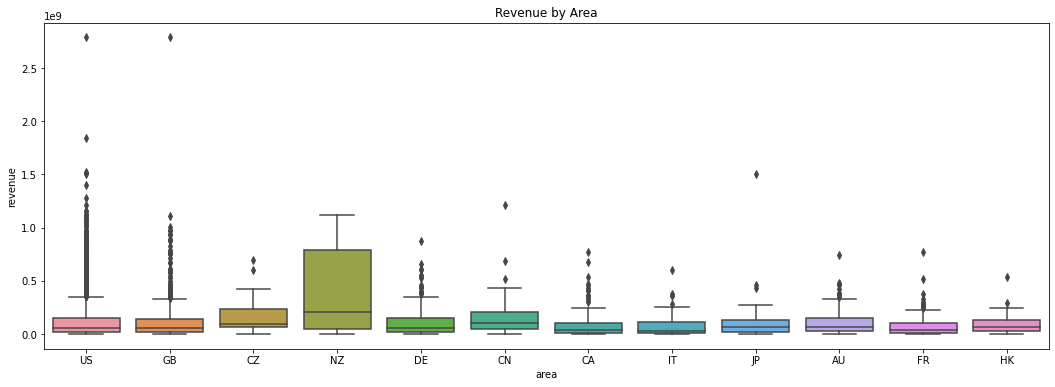

In [118]:
x = 'area'
y = 'revenue'

plt.figure(figsize=(18,6))
ax = sns.boxplot(x=x,y=y, data=df2)
plt.title('Revenue by Area')
plt.show()

Dựa vào biểu đồ ta thấy khu vực ở NZ   có danh thu  trung bình cao nhất,nên có thể khu vực ảnh hưởng đén đoanh thu  trên sample
Ta thực hiện pair sample T_test để kiểm định xem danh thu có ảnh hưởng đến revenue hay không trên population
H0:doanh thu trên khu vực NZ
H1:doanh thu trên khu vực khác

In [119]:
sample_8 = df2[df2['area']=='NZ']['revenue']
sample_9 = df2[df2['area']!='NZ']['revenue']
sci.stats.ttest_ind(sample_8,sample_9)

Ttest_indResult(statistic=6.396599691858479, pvalue=1.755839229698503e-10)

kết luận: Khu vực ảnh hưởng đến doanh thu.

2/ Sự ảnh hưởng của thẻ loại đến điểm và doanh thu .

In [120]:
movies['genres'] = movies['genres'].apply(ast.literal_eval)

In [121]:
genres = []
revenues = []
scores = []

genres_column = movies['genres']
revenue_column = movies['revenue']
score_column = movies['vote_average']

for index, values in enumerate(genres_column):
    if revenue_column[index] != 0:
        for value in values:
            genres.append(value['name'])
            revenues.append(revenue_column[index])
            scores.append(score_column[index])          

l = [genres,revenues, scores]
df1 = pd.DataFrame(l, index=['genres','revenue', 'score']).T
df1.head(10)

,genres,revenue,score
0,Action,2787965087,7.2
1,Adventure,2787965087,7.2
2,Fantasy,2787965087,7.2
3,Science Fiction,2787965087,7.2
4,Adventure,961000000,6.9
5,Fantasy,961000000,6.9
6,Action,961000000,6.9
7,Action,880674609,6.3
8,Adventure,880674609,6.3
9,Crime,880674609,6.3


c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'revenue')

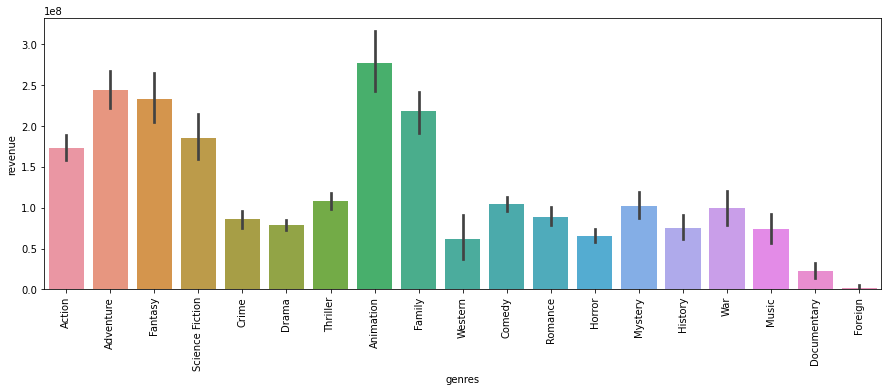

In [122]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')

sns.barplot(df1.genres,df1.revenue)
plt.xlabel('genres')
plt.ylabel('revenue')

Dựa vào biểu đồ ta thấy thể loại phim Animation có danh thu cao nhất trên sample
Ta thực hiện pair sample T_test để kiểm định xem danh thu có ảnh hưởng đến revenue hay không với 
H0:doanh thu trên khu vực Animation
H1:doanh thu trên khu vực khác





In [123]:
sample_1 = df1[df1['genres']=='Animation']['revenue']
sample_2 = df1[df1['genres']!='Animation']['revenue']
sci.stats.ttest_ind(sample_1,sample_2)

Ttest_indResult(statistic=10.339202581353362, pvalue=6.480053658965875e-25)

ta thấy p<0.05 nên ta bác bỏ Ho,chấp nhận H1

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'score')

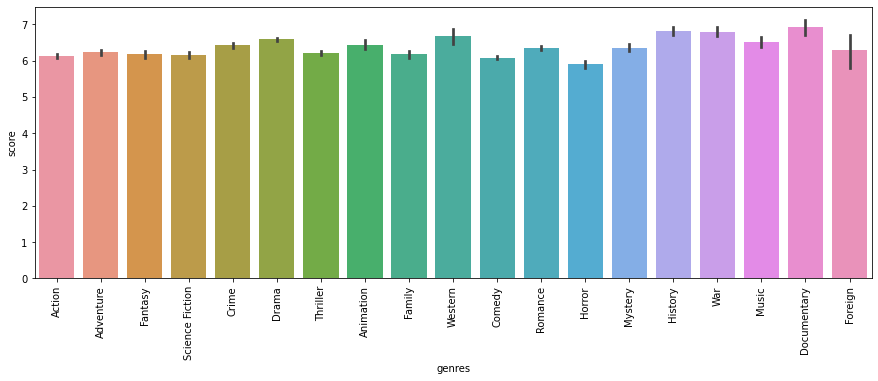

In [124]:



plt.figure(figsize=(15,5))
plt.xticks(rotation='90')

sns.barplot(df1.genres,df1.score)
plt.xlabel('genres')
plt.ylabel('score')

Nhận thấy không có sự thay đổi score_average đến revenue
Ta thấy Animation có số điểm cao nhất
Ta thực hiện kiểm định T-test

H0:doanh thu trên khu vực có điểm cao Animation
H1:doanh thu trên khu vực khác

In [125]:
sample_3 = df1[df1['genres']=='Documentary']['score']
sample_4 = df1[df1['genres']!='Documentary']['score']
sci.stats.ttest_ind(sample_3,sample_4)

Ttest_indResult(statistic=4.954027224610867, pvalue=7.403202572124791e-07)

Ta thấy p<0.05 nên ta bác bỏ H0, chấp nhận H1

KẾT LUẬN: Thẻ loại có ảnh hưởng đến điểm và doanh thu .

3/ ảnh hưởng của năm phát hành đến doanh thu

In [126]:
# chuyen doi ngay thang
movies.release_date = pd.to_datetime(movies.release_date)

# tao cot tuan
movies['weekdays'] = movies.release_date.dt.weekday
movies.drop(movies[movies.release_date.isnull()].index, inplace=True)

# chuyen ngay torng tuan thanh thu
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_names[key] for key in range(7)}
movies['weekdays'] = movies.weekdays.apply(lambda x: weekday_dict[x])

# chuyen doi y-m-d to m-d:
def date_to_day(date):
    y, m, d = str(date)[:10].split("-")
    return m + "-" + d
movies['day'] = movies.release_date.apply(date_to_day)

# chuyen doi y-m-d to m:
def date_to_month(date):
    y, m, d = str(date)[:10].split("-")
    return m
movies['month'] = movies.release_date.apply(date_to_month)


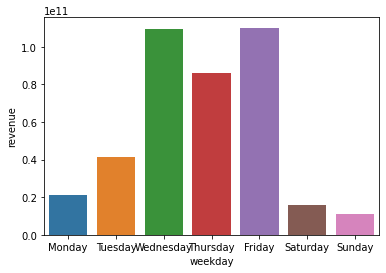

In [127]:
weekday_sum = movies.groupby("weekdays").sum()
weekday_sum = weekday_sum.loc[weekday_names]
weekday_sum['weekday'] = weekday_sum.index
# plot
ax = sns.barplot(x="weekday", y = "revenue", data=weekday_sum)

Các ngày trong tuần có ảnh hưởng đến doanh thu.Khi chiếu ngày thứ 3,4,5 thì doanh thu sẽ cao hơn.

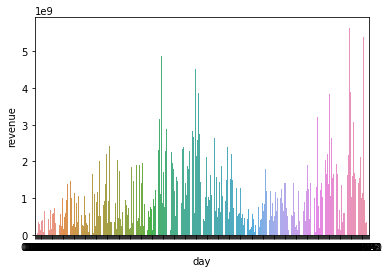

In [128]:
day_sum = movies.groupby("day").sum()
day_sum['day'] = day_sum.index
# day_sum
# plot
ax = sns.barplot(x="day", y = "revenue", data=day_sum)

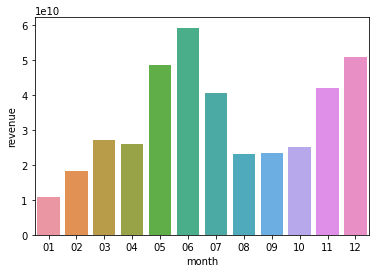

In [129]:
month_sum = movies.groupby("month").sum()
month_sum['month'] = month_sum.index
# day_sum
# plot
ax = sns.barplot(x="month", y = "revenue", data=month_sum)

Phim có doanh thu cao khi phát hành vào tháng 6,7, 11,12 .Chắc có thể nghỉ hè và nghỉ tết.

In [130]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [131]:
movies.head()

,budget,genres,original_title,popularity,production_companies,production_countries,release_date,revenue,title,vote_average,vote_count,score_average,weekdays,day,month,year
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,Avatar,7.2,11800,7.050669,Thursday,12-10,12,2009
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,6.665696,Saturday,05-19,05,2007
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,Spectre,6.3,4466,6.239396,Monday,10-26,10,2015
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,7.346721,Monday,07-16,07,2012
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,John Carter,6.1,2124,6.096368,Wednesday,03-07,03,2012


In [132]:
gross_top = movies[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
gross_top

,title,budget,revenue,year
0,Avatar,237000000,2787965087,2009
25,Titanic,200000000,1845034188,1997
16,The Avengers,220000000,1519557910,2012
28,Jurassic World,150000000,1513528810,2015
44,Furious 7,190000000,1506249360,2015
7,Avengers: Age of Ultron,280000000,1405403694,2015
124,Frozen,150000000,1274219009,2013
31,Iron Man 3,200000000,1215439994,2013
546,Minions,74000000,1156730962,2015
26,Captain America: Civil War,250000000,1153304495,2016


Những bộ phim có doanh thu cao qua từng năm.

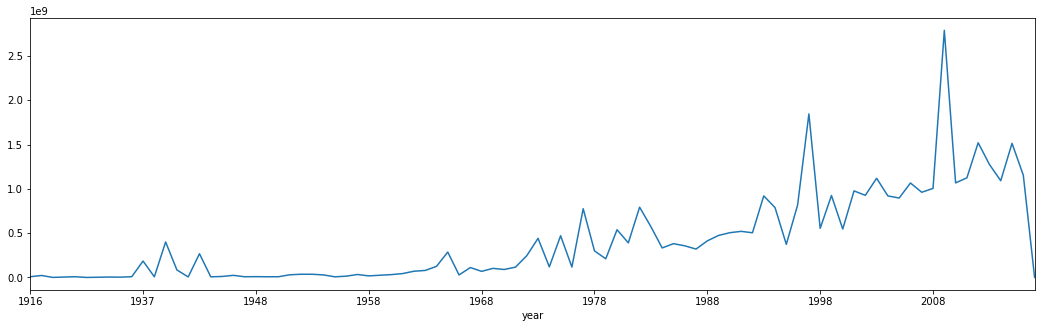

In [133]:
plt.figure(figsize=(18,5))
year_revenue = movies[(movies['revenue'].notnull()) & (movies['year'] != 'NaT')].groupby('year')['revenue'].max()
year_revenue.plot(kind='line')

Ta nhận thấy doanh thu tăng đều đặn hàng năm


KẾT LUẬN:



1.KHU VỰC CÓ ẢNH HƯỞNG ĐẾN DOANH THU CỦA PHIM.
2.THỂ LOẠI CŨNG ẢNH HƯỞNG ĐẾN DOANH THU VÀ ĐIỂM CỦA PHIM.
3.NGÀY RA MẮT PHIM CŨNG ẢNH HƯỞNG ĐẾN DOANH THU.





